# Importing basic libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy

In [2]:
import numpy
import scipy
import sklearn
import imblearn

print("NumPy version:", numpy.__version__)
print("SciPy version:", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)
print("imblearn version:", imblearn.__version__)


NumPy version: 1.26.4
SciPy version: 1.13.1
scikit-learn version: 1.5.1
imblearn version: 0.12.3


# Loading the dataset

In [90]:
df=pd.read_csv('Combined Data.csv/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [91]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the first few rows to verify
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [92]:
df.tail()

,statement,status
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,I have really bad door anxiety! It's not about...,Anxiety


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


# Length of the Dataset

In [94]:
len(df)

53043

# size and shape of the dataset

In [95]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 53043
Number of columns: 2


# Description of the dataset

In [96]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


# checking for missing values in the dataframe.

In [97]:
print(df.isnull().sum())

statement    362
status         0
dtype: int64


# Dropping these missing values:

In [98]:
df = df.dropna()
print(df.isnull().sum())

statement    0
status       0
dtype: int64


# Exploratory Data Analysis:

In [99]:
# Calculate the length of each statement
df['statement_length'] = df['statement'].apply(len)

# Display basic statistics of statement lengths
print(df['statement_length'].describe())

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: statement_length, dtype: float64


# checking the number of nunique values in the dataset

In [100]:
df['status'].nunique()

7

# checking the unique values in the dataset.

In [101]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

# number of characters and words per statement:

In [102]:
# characters length
df['statment_length']=df['statement'].apply(lambda x:len(x))
# words length
df['num_of_words']=df['statement'].apply(lambda x:len(x.split()))
print("Maximum number of characters per statment:", df['statment_length'].max())
print("Maximum number of words per statment:", df['num_of_words'].max())


Maximum number of characters per statment: 32759
Maximum number of words per statment: 6300


# distribution of the 'status' column with their value counts

In [103]:
# Check the distribution of the 'status' column with their value counts
sentiment_distribution = df['status'].value_counts()

# Display the distribution
print(sentiment_distribution)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='status'>

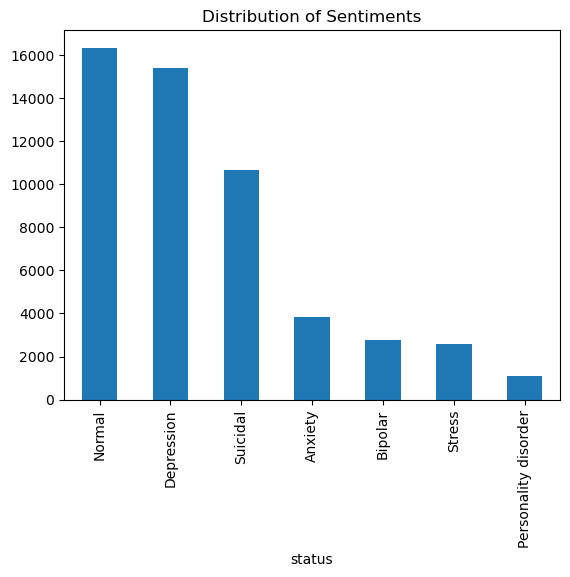

In [104]:
# plotting graph for visualizations
sentiment_distribution.plot(kind='bar', title='Distribution of Sentiments')

# Correlation between statement length and number of words

<Axes: >

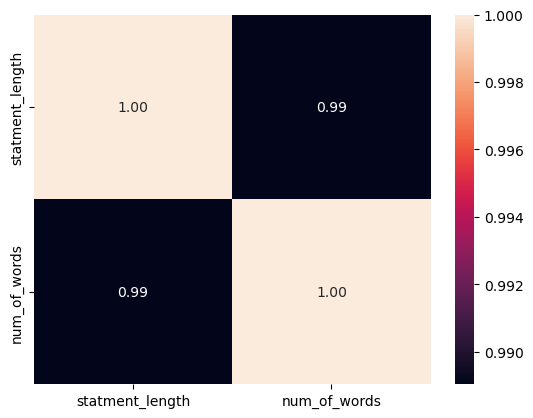

In [105]:
import seaborn as sns
corr=df[['statment_length','num_of_words']].corr()
sns.heatmap(corr,annot=True,fmt='.2f')

# Data Preprocessing:

In [106]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download

# Download necessary NLTK resources
download('stopwords')
download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove repetitive words (keep only unique words)
    tokens = list(set(tokens))
    
    # Reconstruct the text from tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text





In [108]:
# Apply preprocessing to the 'statement' column
df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Display the DataFrame with cleaned text
print(df[['cleaned_statement', 'status']])

                                       cleaned_statement   status
0                                                oh gosh  Anxiety
1      tune restless heart trouble mind sleeping conf...  Anxiety
2      forward restless dear stay place back wrong doubt  Anxiety
3      something focus still worried ive im shifted else  Anxiety
4                             restless boy month im mean  Anxiety
...                                                  ...      ...
53038  used meds talk including life ” anything know ...  Anxiety
53039  ridiculous affects life ruining know didnt mak...  Anxiety
53040       didnt meds better sleep help cant nights way  Anxiety
53041  45 past week anything minutes next makes anyon...  Anxiety
53042  something doors front wrong way open didnt na ...  Anxiety

[52681 rows x 2 columns]


# Balancing the Dataset

In [109]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df['cleaned_statement']  # Using the preprocessed text data
y = df['status']  # Using the original status labels (categorical)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))




Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: Counter({'Anxiety': 16343, 'Normal': 16343, 'Depression': 16343, 'Suicidal': 16343, 'Stress': 16343, 'Bipolar': 16343, 'Personality disorder': 16343})


# Training and Testing Split:

In [110]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (91520, 78550)
X_test shape: (22881, 78550)
y_train shape: (91520,)
y_test shape: (22881,)


# Baseline Model: Majority Class Classifier.

Accuracy of Majority Class Classifier on Test Data: 0.14
Classification Report for Majority Class Classifier:
                      precision    recall  f1-score   support

             Anxiety       0.00      0.00      0.00      3375
             Bipolar       0.00      0.00      0.00      3214
          Depression       0.00      0.00      0.00      3274
              Normal       0.00      0.00      0.00      3325
Personality disorder       0.00      0.00      0.00      3241
              Stress       0.14      1.00      0.25      3209
            Suicidal       0.00      0.00      0.00      3243

            accuracy                           0.14     22881
           macro avg       0.02      0.14      0.04     22881
        weighted avg       0.02      0.14      0.03     22881

ROC-AUC Score: 0.50


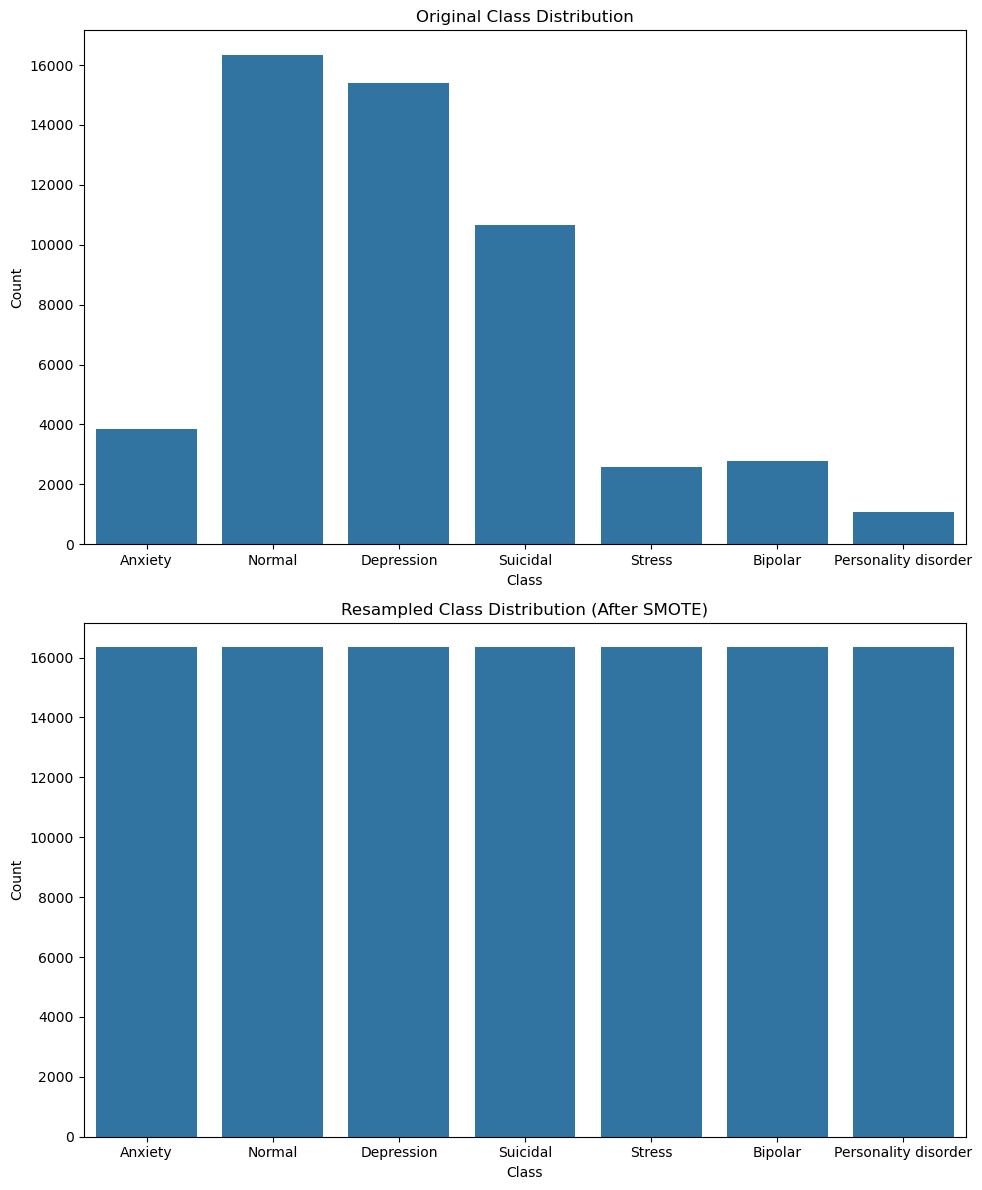

In [111]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Majority Class Classifier
majority_class_clf = DummyClassifier(strategy='most_frequent')

# Fit the classifier on the training data
majority_class_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = majority_class_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Majority Class Classifier on Test Data: {accuracy:.2f}')

# Print the classification report
print("Classification Report for Majority Class Classifier:")
print(classification_report(y_test, y_pred, zero_division=0))

# Compute the ROC-AUC score (for multi-class problem)
# Binarize the output labels for ROC-AUC calculation
y_test_bin = label_binarize(y_test, classes=majority_class_clf.classes_)
y_pred_bin = label_binarize(y_pred, classes=majority_class_clf.classes_)

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 2: Visualize the original and resampled class distribution
fig, ax = plt.subplots(2, 1, figsize=(10, 12))  
# Original class distribution
sns.countplot(x=y, ax=ax[0])  # Ensure correct x parameter
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# Resampled class distribution
sns.countplot(x=y_resampled, ax=ax[1])  
ax[1].set_title('Resampled Class Distribution (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()  
plt.show()


<Figure size 1000x700 with 0 Axes>

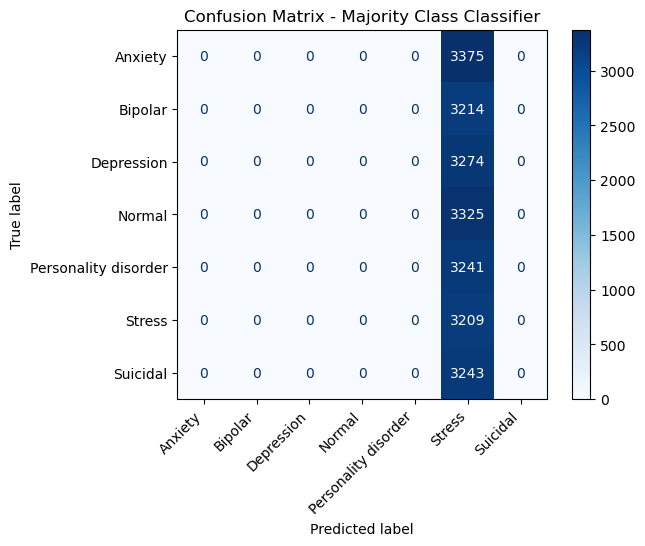

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix for Majority Class Classifier
conf_matrix = confusion_matrix(y_test, y_pred, labels=majority_class_clf.classes_)

# Plot confusion matrix for Majority Class Classifier
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=majority_class_clf.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix - Majority Class Classifier')
plt.show()


# Traditional Machine Learning Models

# Naive Bayes:

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Assuming X_resampled and y_resampled are already defined# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)
y_prob = nb_clf.predict_proba(X_test)

# Print the classification report for each classprint("Classification Report:")
print(classification_report(y_test, y_pred))

# Binarize the output labels for ROC-AUC calculation (for multi-class problems)
y_test_bin = label_binarize(y_test, classes=nb_clf.classes_)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

print(f"ROC-AUC: {roc_auc:.2f}")


                      precision    recall  f1-score   support

             Anxiety       0.85      0.88      0.86      3375
             Bipolar       0.78      0.96      0.86      3214
          Depression       0.60      0.60      0.60      3274
              Normal       0.96      0.42      0.58      3325
Personality disorder       0.73      0.99      0.84      3241
              Stress       0.80      0.84      0.82      3209
            Suicidal       0.73      0.65      0.69      3243

            accuracy                           0.76     22881
           macro avg       0.78      0.76      0.75     22881
        weighted avg       0.78      0.76      0.75     22881

ROC-AUC: 0.97


# Hyperparameter tuning:

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

def tune_naive_bayes(X_resampled, y_resampled, param_grid, test_size=0.2, random_state=42, cv=5):
    """
    Function to perform hyperparameter tuning on a Multinomial Naive Bayes model.

    Parameters:
    - X_resampled: Feature matrix (sparse matrix or dense array).
    - y_resampled: Target vector.
    - param_grid: Dictionary of hyperparameters to tune.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Controls the shuffling applied to the data before applying the split.
    - cv: Number of cross-validation folds.

    Returns:
    - best_params: Best hyperparameters found.
    - metrics: Dictionary containing evaluation metrics (classification report and ROC-AUC).
    """# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)

    # Initialize the Naive Bayes classifier
    nb_clf = MultinomialNB()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(nb_clf, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator and its parameters
    best_nb_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Train the best estimator on the entire training set
    best_nb_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_nb_clf.predict(X_test)
    y_prob = best_nb_clf.predict_proba(X_test)

    # Print the classification report
    classification_rep = classification_report(y_test, y_pred)

    # Binarize the output labels for ROC-AUC calculation (for multi-class problems)
    y_test_bin = label_binarize(y_test, classes=best_nb_clf.classes_)

    # Calculate the ROC-AUC score
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    # Compile metrics
    metrics = {
        'classification_report': classification_rep,
        'ROC-AUC': roc_auc
    }

    return best_params, metrics

# Example usage:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")


Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.87      0.93      0.90      3375
             Bipolar       0.87      0.97      0.92      3214
          Depression       0.69      0.59      0.63      3274
              Normal       0.93      0.62      0.75      3325
Personality disorder       0.86      0.99      0.92      3241
              Stress       0.86      0.93      0.89      3209
            Suicidal       0.71      0.78      0.75      3243

            accuracy                           0.83     22881
           macro avg       0.83      0.83      0.82     22881
        weighted avg       0.83      0.83      0.82     22881

ROC-AUC: 0.98


In [25]:
# Example usage:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.88      0.92      0.90      3375
             Bipolar       0.87      0.97      0.92      3214
          Depression       0.69      0.58      0.63      3274
              Normal       0.93      0.62      0.75      3325
Personality disorder       0.86      0.99      0.92      3241
              Stress       0.85      0.93      0.89      3209
            Suicidal       0.71      0.78      0.75      3243

            accuracy                           0.83     22881
           macro avg       0.83      0.83      0.82     22881
        weighted avg       0.83      0.83      0.82     22881

ROC-AUC: 0.98


In [26]:
# Example usage:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0], 'fit_prior': [True, False]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

Best Parameters: {'alpha': 0.01, 'fit_prior': False}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.89      0.94      0.91      3375
             Bipolar       0.88      0.98      0.93      3214
          Depression       0.71      0.60      0.65      3274
              Normal       0.94      0.64      0.76      3325
Personality disorder       0.89      0.99      0.94      3241
              Stress       0.88      0.94      0.91      3209
            Suicidal       0.71      0.80      0.75      3243

            accuracy                           0.84     22881
           macro avg       0.84      0.84      0.84     22881
        weighted avg       0.84      0.84      0.84     22881

ROC-AUC: 0.98


In [27]:
# Example usage:
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0], 'fit_prior': [True]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

Best Parameters: {'alpha': 0.01, 'fit_prior': True}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.89      0.94      0.92      3375
             Bipolar       0.88      0.98      0.93      3214
          Depression       0.71      0.60      0.65      3274
              Normal       0.94      0.64      0.76      3325
Personality disorder       0.89      0.99      0.94      3241
              Stress       0.88      0.94      0.91      3209
            Suicidal       0.71      0.80      0.75      3243

            accuracy                           0.84     22881
           macro avg       0.84      0.84      0.84     22881
        weighted avg       0.84      0.84      0.84     22881

ROC-AUC: 0.98


# Logistic Regression:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Initialize the Logistic Regression classifier
logreg_clf = LogisticRegression(max_iter=500, random_state=42)

# Train the classifier
logreg_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_clf.predict(X_test)
y_prob = logreg_clf.predict_proba(X_test)

# Print classification report for each label
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# For ROC-AUC, binarize the output labels if it's a multi-class problem
y_test_bin = label_binarize(y_test, classes=logreg_clf.classes_)
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

# Print the ROC-AUC score
print(f"ROC-AUC: {roc_auc:.2f}")


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.95      0.95      0.95      3375
             Bipolar       0.96      0.96      0.96      3214
          Depression       0.75      0.64      0.69      3274
              Normal       0.85      0.91      0.88      3325
Personality disorder       0.97      0.99      0.98      3241
              Stress       0.91      0.95      0.93      3209
            Suicidal       0.74      0.74      0.74      3243

            accuracy                           0.88     22881
           macro avg       0.88      0.88      0.88     22881
        weighted avg       0.88      0.88      0.88     22881

ROC-AUC: 0.98


# Hyperparameter Tuning:

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

# Function to train and evaluate the Logistic Regression model
def train_and_evaluate(X_resampled, y_resampled, param_grid=None):
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Initialize the Logistic Regression classifier
    logreg_clf = LogisticRegression(random_state=42)
    
    # If param_grid is provided, use GridSearchCV for hyperparameter tuning
    if param_grid:
        grid_search = GridSearchCV(logreg_clf, param_grid, scoring='accuracy', cv=3, n_jobs=-1)  
        grid_search.fit(X_train, y_train)
        logreg_clf = grid_search.best_estimator_
        print("Best Parameters:", grid_search.best_params_)
    else:
        # Train the classifier without hyperparameter tuning
        logreg_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = logreg_clf.predict(X_test)
    y_prob = logreg_clf.predict_proba(X_test)
    
    # Print classification report for each label
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # For ROC-AUC, binarize the output labels if it's a multi-class problem
    y_test_bin = label_binarize(y_test, classes=logreg_clf.classes_)
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    
    # Print the ROC-AUC score
    print(f"ROC-AUC: {roc_auc:.2f}")

# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [100]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)


Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.93      0.94      0.94      3375
             Bipolar       0.96      0.96      0.96      3214
          Depression       0.75      0.62      0.68      3274
              Normal       0.84      0.92      0.87      3325
Personality disorder       0.96      0.99      0.98      3241
              Stress       0.90      0.93      0.92      3209
            Suicidal       0.74      0.74      0.74      3243

            accuracy                           0.87     22881
           macro avg       0.87      0.87      0.87     22881
        weighted avg       0.87      0.87      0.87     22881

ROC-AUC: 0.98


In [30]:
# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.5, 1.0, 5.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [150]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 5.0, 'max_iter': 150, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.98      0.98      3214
          Depression       0.77      0.65      0.71      3274
              Normal       0.89      0.92      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.93      0.98      0.95      3209
            Suicidal       0.75      0.76      0.75      3243

            accuracy                           0.89     22881
           macro avg       0.89      0.89      0.89     22881
        weighted avg       0.89      0.89      0.89     22881

ROC-AUC: 0.98


In [31]:
# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [1.0, 10.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [100, 200]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.99      0.98      3214
          Depression       0.78      0.67      0.72      3274
              Normal       0.90      0.91      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.94      0.99      0.96      3209
            Suicidal       0.75      0.77      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881

ROC-AUC: 0.98


In [32]:
# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [1.0, 10.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [500]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 10.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.99      0.98      3214
          Depression       0.78      0.67      0.72      3274
              Normal       0.90      0.91      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.94      0.99      0.96      3209
            Suicidal       0.75      0.77      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881

ROC-AUC: 0.98


# Traditional Deep Learning Models

# LSTM

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  # Reduce vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  # Set a fixed sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)



Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [34]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))  # Embedding layer
model.add(LSTM(64, return_sequences=False))  # LSTM layer
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Print model summary to check the shapes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 163,335
Trainable params: 163,335
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1430/1430 - 42s - loss: 1.3672 - accuracy: 0.4379 - val_loss: 1.2188 - val_accuracy: 0.4960 - 42s/epoch - 29ms/step
Epoch 2/5
1430/1430 - 33s - loss: 1.1645 - accuracy: 0.5

# Hyperparameter Tuning:

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

def preprocess_data(df, vocab_size, max_len):
    """
    Tokenizes and pads the text data, applies SMOTE, and splits the data into training and test sets.
    
    Args:
    - df: DataFrame containing 'cleaned_statement' and 'status'.
    - vocab_size: Number of words to keep in the tokenizer.
    - max_len: Maximum length of sequences for padding.
    
    Returns:
    - X_train, X_test, y_train, y_test: Split and resampled data.
    """
    X = df['cleaned_statement']
    y = df['status']
    
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)
    
    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)
    
    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(y).values
    
    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)
    
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, tokenizer

def build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size):
    """
    Builds, compiles, and trains an LSTM model with specified hyperparameters.
    
    Args:
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - vocab_size: Size of the vocabulary.
    - embedding_dim: Dimension of the embedding layer.
    - lstm_units: Number of units in the LSTM layer.
    - dropout_rate: Dropout rate.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training.
    
    Returns:
    - model: Trained Keras model.
    """
    # Build the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Print model summary to check the shapes
    model.summary()
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
    
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model and prints performance metrics.
    
    Args:
    - model: Trained Keras model.
    - X_test, y_test: Test data.
    
    Returns:
    - None
    """
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')
    
    # Predict probabilities
    y_pred_prob = model.predict(X_test)
    
    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

# Main execution
if __name__ == "__main__":
    
    
    # Hyperparameters
    vocab_size = 2000
    max_len = 200
    embedding_dim = 64
    lstm_units = 64
    dropout_rate = 0.3
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          128000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 163,335
Trainable params: 163,335
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1430/1430 - 47s - loss: 1.4015 - accur

In [36]:
# Main execution
if __name__ == "__main__":
    
    
    # Hyperparameters
    vocab_size = 2000
    max_len = 200
    embedding_dim = 100
    lstm_units = 128
    dropout_rate = 0.3
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         200000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 321,607
Trainable params: 321,607
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1430/1430 - 94s - loss: 1.3615 - accur

# RNN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  # Reduce vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  # Set a fixed sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)

Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [39]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len))  # Reduced embedding dimension
model.add(SimpleRNN(64, return_sequences=False))  # Simple RNN layer
model.add(Dropout(0.3))  # Reduced dropout
model.add(Dense(16, activation='relu'))  # Reduced Dense layer size
model.add(Dense(y_train.shape[1], activation='softmax'))

# Print model summary to check the shapes
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=2)  # Reduced epochs and batch size

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           64000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 7)                 119       
                                                                 
Total params: 71,367
Trainable params: 71,367
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
2860/2860 - 465s - loss: 1.4720 - accura

# Hyperparameter Tuning:

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

def preprocess_data(df, vocab_size, max_len):
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df['cleaned_statement'])
    X_seq = tokenizer.texts_to_sequences(df['cleaned_statement'])

    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)

    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(df['status']).values

    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

    return X_resampled, y_resampled, tokenizer

def build_rnn_model(vocab_size, max_len, embedding_dim, rnn_units, dense_units, dropout_rate, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(rnn_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Set num_classes to match target classes
    return model

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    # Print model summary to check the shapes
    model.summary()
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')

    # Predict probabilities
    y_pred_prob = model.predict(X_test)

    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

# Main execution
if __name__ == "__main__":
    # Adjusted Hyperparameters
    vocab_size = 2000        
    max_len = 200            
    embedding_dim = 16       
    rnn_units = 32           
    dense_units = 8          
    dropout_rate = 0.3      
    epochs = 3               
    batch_size = 16          

    # Preprocess data
    X_resampled, y_resampled, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Number of classes based on the one-hot encoded labels
    num_classes = y_train.shape[1]

    # Build the model
    model = build_rnn_model(vocab_size, max_len, embedding_dim, rnn_units, dense_units, dropout_rate, num_classes)

    # Train and evaluate the model
    train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 16)           32000     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 7)                 63        
                                                                 
Total params: 33,895
Trainable params: 33,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
5720/5720 - 1940s - loss: 1.5102 - accur

In [43]:
# Main execution
if __name__ == "__main__":
    # Adjusted Hyperparameters
    vocab_size = 3000        
    max_len = 150            
    embedding_dim = 16       
    rnn_units = 32           
    dense_units = 8          
    dropout_rate = 0.4      
    epochs = 3               
    batch_size = 16          

    # Preprocess data
    X_resampled, y_resampled, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Number of classes based on the one-hot encoded labels
    num_classes = y_train.shape[1]

    # Build the model
    model = build_rnn_model(vocab_size, max_len, embedding_dim, rnn_units, dense_units, dropout_rate, num_classes)

    # Train and evaluate the model
    train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs, batch_size)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 16)           48000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 7)                 63        
                                                                 
Total params: 49,895
Trainable params: 49,895
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
5720/5720 - 1335s - loss: 1.5152 - accur